In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.xkcd()
plt.rcParams['font.family'] = "xkcd"

In [3]:
from io import StringIO

def load_csv(path, names):
    lines = []
    with open(path, "r") as f:
        for line in f.readlines():
            if "OOM" in line:
                continue
            lines.append(line)
    df = pd.read_csv(
        StringIO("\n".join(lines)),
        header=None,
        names=names
    )
    return df

# Small model

In [4]:
small_model_no_offload_df = load_csv(
    "./batch-size-memory-modeling-0.5B/results-no-optimizer-offload.csv",
    names=['Batch size', 'Allocated MiB', 'Reserved MiB', 'Iterations/second']
)
small_model_no_offload_df.head()

,Batch size,Allocated MiB,Reserved MiB,Iterations/second
0,1,14048,16538,4.348797
1,2,20228,21662,2.368082


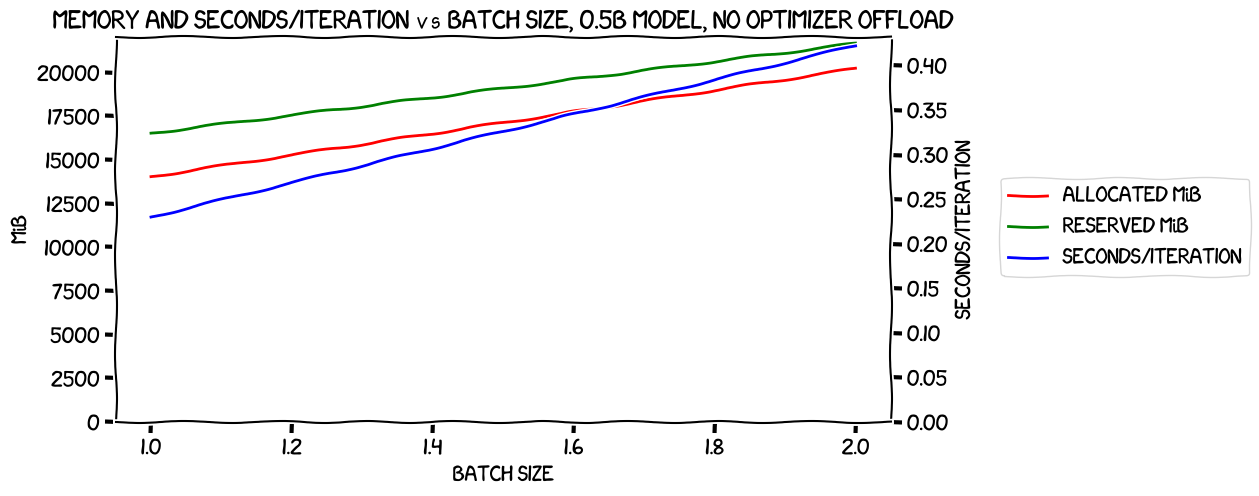

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(small_model_no_offload_df['Batch size'], small_model_no_offload_df['Allocated MiB'], label='ALLOCATED MiB', color='red')
ax1.plot(small_model_no_offload_df['Batch size'], small_model_no_offload_df['Reserved MiB'], label='RESERVED MiB', color='green')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.plot(small_model_no_offload_df['Batch size'], 1 / small_model_no_offload_df['Iterations/second'], label='SECONDS/ITERATION', color='blue')
ax2.set_ylabel('SECONDS/ITERATION')
ax2.tick_params(axis='y')
ax2.set_ylim(bottom=0)

plt.title('MEMORY AND SECONDS/ITERATION vs BATCH SIZE, 0.5B MODEL, NO OPTIMIZER OFFLOAD')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-and-seconds-per-iteration-vs-batch-size-small-model-without-offload.png", bbox_inches='tight')
plt.show()

In [6]:
small_model_with_offload_df = load_csv(
    "./batch-size-memory-modeling-0.5B/results-with-optimizer-offload.csv",
    names=['Batch size', 'Allocated MiB', 'Reserved MiB', 'Iterations/second']
)
small_model_with_offload_df.head()

,Batch size,Allocated MiB,Reserved MiB,Iterations/second
0,1,6023,7244,1.450000
1,2,9702,10204,1.079142
2,3,13381,14364,0.883156
3,4,17060,18684,0.734090
4,5,20740,21884,0.637688


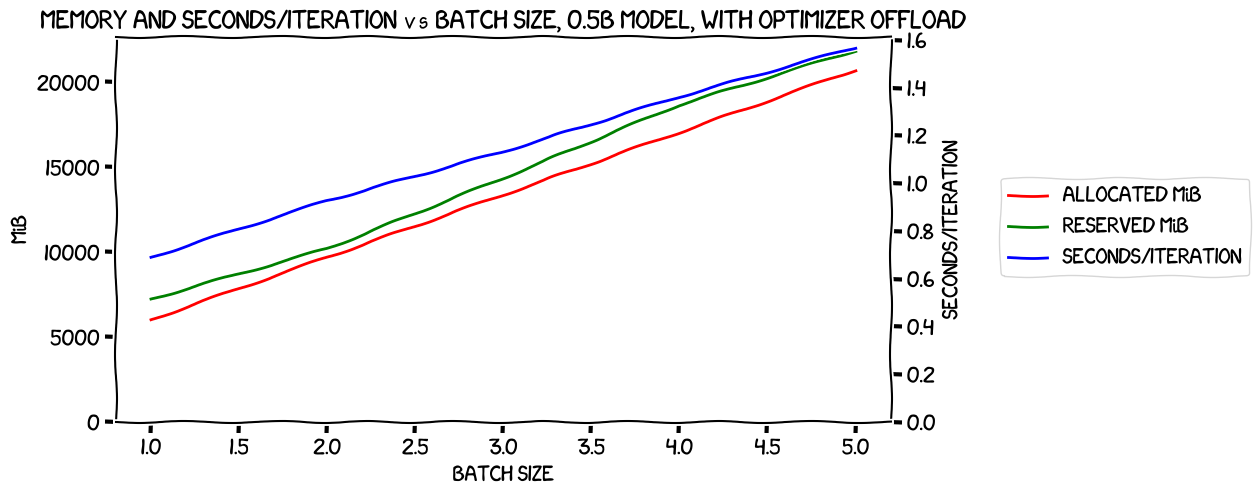

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(small_model_with_offload_df['Batch size'], small_model_with_offload_df['Allocated MiB'], label='ALLOCATED MiB', color='red')
ax1.plot(small_model_with_offload_df['Batch size'], small_model_with_offload_df['Reserved MiB'], label='RESERVED MiB', color='green')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.plot(small_model_with_offload_df['Batch size'], 1 / small_model_with_offload_df['Iterations/second'], label='SECONDS/ITERATION', color='blue')
ax2.set_ylabel('SECONDS/ITERATION')
ax2.tick_params(axis='y')
ax2.set_ylim(bottom=0)

plt.title('MEMORY AND SECONDS/ITERATION vs BATCH SIZE, 0.5B MODEL, WITH OPTIMIZER OFFLOAD')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-and-seconds-per-iteration-vs-batch-size-small-model-with-offload.png", bbox_inches='tight')
plt.show()

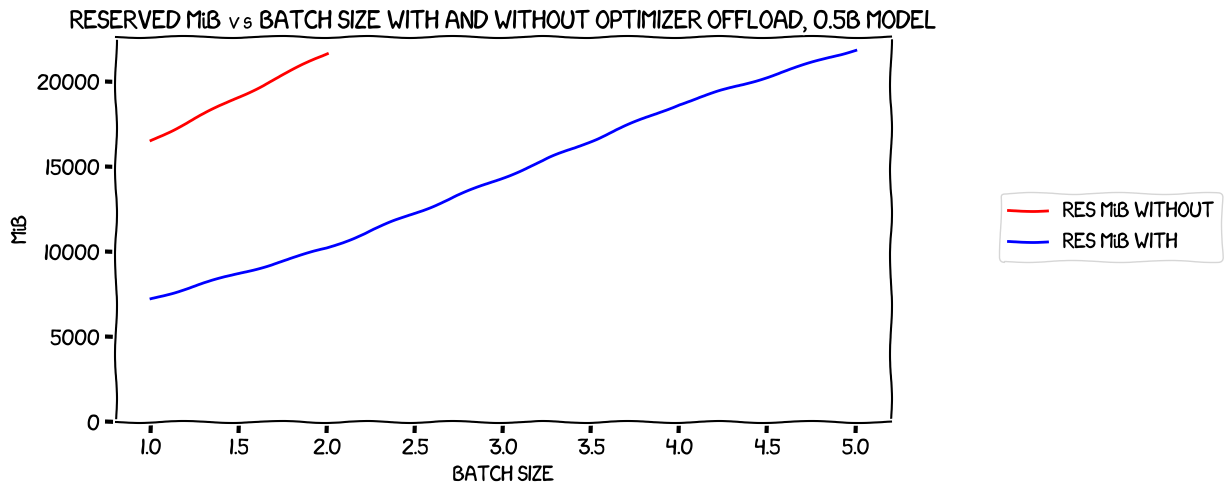

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(small_model_no_offload_df['Batch size'], small_model_no_offload_df['Reserved MiB'], label='RES MiB WITHOUT', color='red')
ax1.plot(small_model_with_offload_df['Batch size'], small_model_with_offload_df['Reserved MiB'], label='RES MiB WITH', color='blue')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

plt.title('RESERVED MiB vs BATCH SIZE WITH AND WITHOUT OPTIMIZER OFFLOAD, 0.5B MODEL')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-vs-batch-size-small-model-with-and-without-offload.png", bbox_inches='tight')
plt.show()

In [9]:
total_samples = 19692

def add_seconds_to_complete(df):
    df['Num iterations'] = (total_samples / df['Batch size']).astype(int)
    df['Seconds to complete'] = (df['Num iterations'] / df['Iterations/second']).astype(int)


In [10]:
add_seconds_to_complete(small_model_no_offload_df)
add_seconds_to_complete(small_model_with_offload_df)

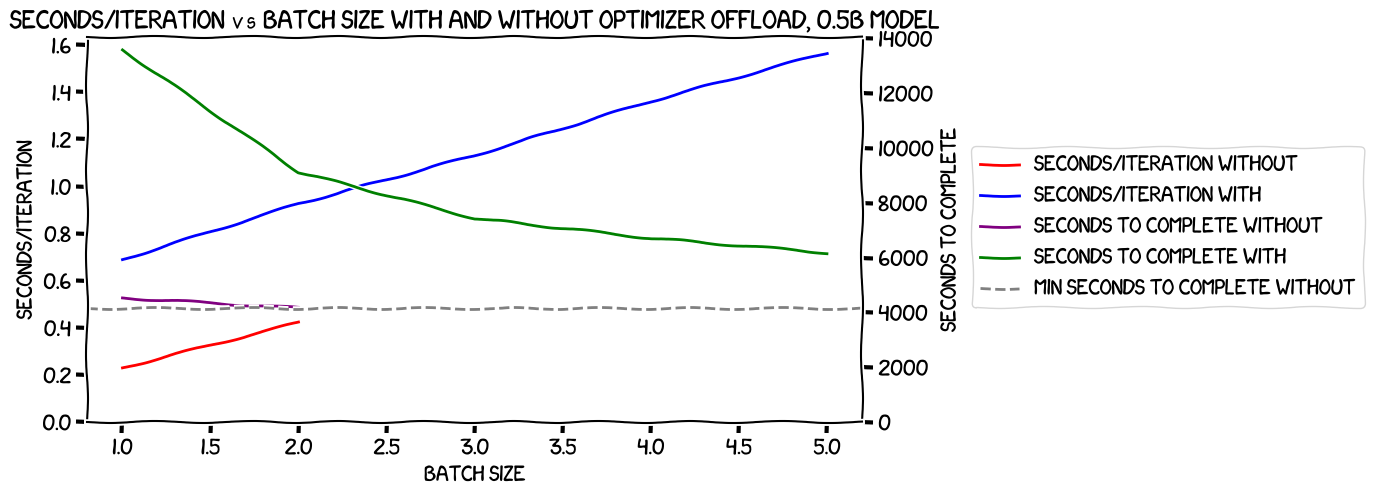

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(small_model_no_offload_df['Batch size'], 1 / small_model_no_offload_df['Iterations/second'], label='SECONDS/ITERATION WITHOUT', color='red')
ax1.plot(small_model_with_offload_df['Batch size'], 1 / small_model_with_offload_df['Iterations/second'], label='SECONDS/ITERATION WITH', color='blue')
ax1.set_ylabel('SECONDS/ITERATION')
ax1.set_xlabel('BATCH SIZE')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.plot(small_model_no_offload_df['Batch size'], small_model_no_offload_df['Seconds to complete'], label='SECONDS TO COMPLETE WITHOUT', color='purple')
ax2.plot(small_model_with_offload_df['Batch size'], small_model_with_offload_df['Seconds to complete'], label='SECONDS TO COMPLETE WITH', color='green')
ax2.set_ylabel('SECONDS TO COMPLETE')
ax2.tick_params(axis='y')
ax2.set_ylim(bottom=0)

min_value = small_model_no_offload_df['Seconds to complete'].min()
ax2.axhline(y=min_value, color='grey', linestyle='--', label='MIN SECONDS TO COMPLETE WITHOUT')

plt.title('SECONDS/ITERATION vs BATCH SIZE WITH AND WITHOUT OPTIMIZER OFFLOAD, 0.5B MODEL')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/seconds-per-iteration-vs-batch-size-small-model-with-and-without-offload.png", bbox_inches='tight')
plt.show()

# Large model

In [12]:
gpu_headers = []
for gpu in range(8):
    gpu_headers.append(f"Allocated MiB cuda{gpu}")
    gpu_headers.append(f"Reserved MiB cuda{gpu}")

large_model_headers = ['Batch size'] + gpu_headers + ['Iterations/second']

In [13]:
large_model_no_offload_df = load_csv(
    "./batch-size-memory-modeling-8B/results-no-optimizer-offload.csv",
    names=large_model_headers
)
large_model_no_offload_df.head()

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,Reserved MiB cuda4,Allocated MiB cuda5,Reserved MiB cuda5,Allocated MiB cuda6,Reserved MiB cuda6,Allocated MiB cuda7,Reserved MiB cuda7,Iterations/second
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49086,55030,1.170660
1,1,0,0,0,0,0,0,0,0,0,0,0,0,49086,55030,0,0,1.170659
2,1,0,0,0,0,49086,55090,0,0,0,0,0,0,0,0,0,0,1.170656
3,1,0,0,49086,55010,0,0,0,0,0,0,0,0,0,0,0,0,1.170654
4,1,0,0,0,0,0,0,0,0,0,0,49086,55070,0,0,0,0,1.170646


In [14]:
def validate_gpu_allocation(df):
    issues = []
    batch_sizes = df['Batch size'].unique()
    
    for batch_size in batch_sizes:
        group = df[df['Batch size'] == batch_size]
        
        if len(group) != 8:
            issues.append(f"Batch size {batch_size}: Expected 8 rows, but found {len(group)}")
            continue
        
        active_gpu_set = set()
        for i, row in group.iterrows():
            active_gpus = [(j, row[f'Allocated MiB cuda{j}']) for j in range(8) if row[f'Allocated MiB cuda{j}'] != 0]
            
            if len(active_gpus) != 1:
                issues.append(f"Batch size {batch_size}, Row {i}: Has {len(active_gpus)} active GPUs, expected 1")
            else:
                gpu_num = active_gpus[0][0]
                if gpu_num in active_gpu_set:
                    issues.append(f"Batch size {batch_size}: GPU {gpu_num} is active in multiple rows")
                active_gpu_set.add(gpu_num)
        
        if len(active_gpu_set) != 8:
            missing_gpus = set(range(8)) - active_gpu_set
            issues.append(f"Batch size {batch_size}: Missing data for GPUs {missing_gpus}")
    
    if not issues:
        print("All rows validated OK")
    else:
        print("Validation issues found:")
        for issue in issues:
            print(f"- {issue}")
    
    print(f"Total batch sizes checked: {len(batch_sizes)}")


In [15]:
validate_gpu_allocation(large_model_no_offload_df)

All rows validated OK
Total batch sizes checked: 2


In [16]:
def normalize_gpu_data(df):
    grouped = df.groupby('Batch size')
    
    normalized_data = []
    
    for batch_size, group in grouped:
        new_row = {'Batch size': batch_size}
        
        # Combine GPU data
        for gpu in range(8):
            allocated = group[f'Allocated MiB cuda{gpu}'].max()
            reserved = group[f'Reserved MiB cuda{gpu}'].max()
            new_row[f'Allocated MiB cuda{gpu}'] = allocated
            new_row[f'Reserved MiB cuda{gpu}'] = reserved
        
        # Average iterations/second
        new_row['Iterations/second'] = group['Iterations/second'].mean()
        
        normalized_data.append(new_row)
    
    # Create new DataFrame
    normalized_df = pd.DataFrame(normalized_data)
    
    # Ensure columns are in the same order as the original DataFrame
    normalized_df = normalized_df[df.columns]
    
    return normalized_df

In [17]:
large_model_no_offload_df = normalize_gpu_data(large_model_no_offload_df)
large_model_no_offload_df.head()

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,Reserved MiB cuda4,Allocated MiB cuda5,Reserved MiB cuda5,Allocated MiB cuda6,Reserved MiB cuda6,Allocated MiB cuda7,Reserved MiB cuda7,Iterations/second
0,1,49086,55030,49086,55010,49086,55090,49086,55010,49086,55030,49086,55070,49086,55030,49086,55030,1.170661
1,2,64180,72638,64180,72638,64180,72638,64180,72638,64180,72638,64180,72638,64180,72618,64180,72638,0.713083


In [18]:
def add_gpu_summary_stats(df):
    # Calculate min, mean, and max for Allocated and Reserved MiB across all GPUs
    for metric in ['Allocated', 'Reserved']:
        # Get all columns for this metric
        cols = [col for col in df.columns if col.startswith(f'{metric} MiB cuda')]
        
        # Calculate min, mean, and max
        df[f'{metric} MiB Min'] = df[cols].min(axis=1)
        df[f'{metric} MiB Mean'] = df[cols].mean(axis=1)
        df[f'{metric} MiB Max'] = df[cols].max(axis=1)
    
    return df


In [19]:
large_model_no_offload_df = add_gpu_summary_stats(large_model_no_offload_df)
large_model_no_offload_df.head()

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,...,Reserved MiB cuda6,Allocated MiB cuda7,Reserved MiB cuda7,Iterations/second,Allocated MiB Min,Allocated MiB Mean,Allocated MiB Max,Reserved MiB Min,Reserved MiB Mean,Reserved MiB Max
0,1,49086,55030,49086,55010,49086,55090,49086,55010,49086,...,55030,49086,55030,1.170661,49086,49086.0,49086,55010,55037.5,55090
1,2,64180,72638,64180,72638,64180,72638,64180,72638,64180,...,72618,64180,72638,0.713083,64180,64180.0,64180,72618,72635.5,72638


In [20]:
def correct_batch_sizes_to_allow_for_multi_gpu(df):
    df["Batch size"] = df["Batch size"] * 8

In [21]:
correct_batch_sizes_to_allow_for_multi_gpu(large_model_no_offload_df)
large_model_no_offload_df.head()

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,...,Reserved MiB cuda6,Allocated MiB cuda7,Reserved MiB cuda7,Iterations/second,Allocated MiB Min,Allocated MiB Mean,Allocated MiB Max,Reserved MiB Min,Reserved MiB Mean,Reserved MiB Max
0,8,49086,55030,49086,55010,49086,55090,49086,55010,49086,...,55030,49086,55030,1.170661,49086,49086.0,49086,55010,55037.5,55090
1,16,64180,72638,64180,72638,64180,72638,64180,72638,64180,...,72618,64180,72638,0.713083,64180,64180.0,64180,72618,72635.5,72638


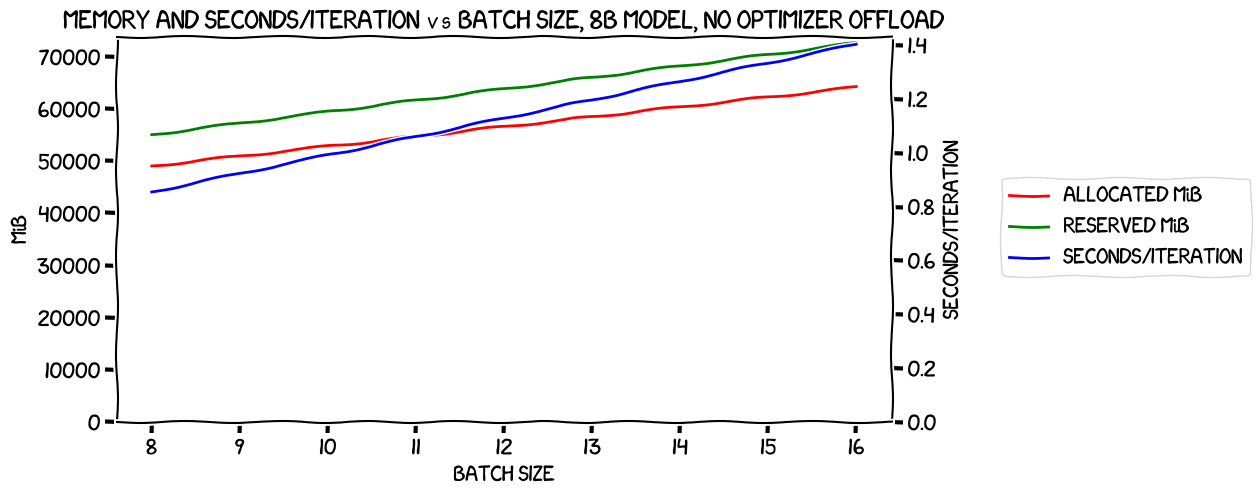

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(large_model_no_offload_df['Batch size'], large_model_no_offload_df['Allocated MiB Max'], label='ALLOCATED MiB', color='red')
ax1.plot(large_model_no_offload_df['Batch size'], large_model_no_offload_df['Reserved MiB Max'], label='RESERVED MiB', color='green')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.plot(large_model_no_offload_df['Batch size'], 1 / large_model_no_offload_df['Iterations/second'], label='SECONDS/ITERATION', color='blue')
ax2.set_ylabel('SECONDS/ITERATION')
ax2.tick_params(axis='y')
ax2.set_ylim(bottom=0)

plt.title('MEMORY AND SECONDS/ITERATION vs BATCH SIZE, 8B MODEL, NO OPTIMIZER OFFLOAD')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-and-seconds-per-iteration-vs-batch-size-large-model-no-offload.png", bbox_inches='tight')
plt.show()

In [23]:
large_model_with_offload_df = load_csv(
    "./batch-size-memory-modeling-8B/results-with-optimizer-offload.csv",
    names=large_model_headers
)
large_model_with_offload_df.head()

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,Reserved MiB cuda4,Allocated MiB cuda5,Reserved MiB cuda5,Allocated MiB cuda6,Reserved MiB cuda6,Allocated MiB cuda7,Reserved MiB cuda7,Iterations/second
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24497,26666,0.275072
1,1,0,0,0,0,21363,22206,0,0,0,0,0,0,0,0,0,0,0.275055
2,1,0,0,0,0,0,0,21363,22206,0,0,0,0,0,0,0,0,0.275059
3,1,0,0,0,0,0,0,0,0,0,0,0,0,21005,22206,0,0,0.275051
4,1,0,0,21363,22206,0,0,0,0,0,0,0,0,0,0,0,0,0.275049


In [24]:
validate_gpu_allocation(large_model_with_offload_df)

All rows validated OK
Total batch sizes checked: 17


In [25]:
large_model_with_offload_df = normalize_gpu_data(large_model_with_offload_df)
large_model_with_offload_df.head()

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,Reserved MiB cuda4,Allocated MiB cuda5,Reserved MiB cuda5,Allocated MiB cuda6,Reserved MiB cuda6,Allocated MiB cuda7,Reserved MiB cuda7,Iterations/second
0,1,23929,26666,21363,22206,21363,22206,21363,22206,21363,22206,21513,22426,21005,22206,24497,26666,0.275053
1,2,24593,27406,24593,25446,24593,25446,24593,25446,24593,25446,24593,25446,24593,25446,25065,25906,0.221014
2,3,28182,29806,28182,29806,28182,29806,28182,29806,28182,29806,28182,29806,28182,29806,28182,29806,0.193776
3,4,31770,34246,31770,34246,31770,34246,31770,34246,31770,34246,31770,34246,31770,34246,31770,34246,0.167022
4,5,35359,38646,35359,38646,35359,38646,35359,38646,35359,38646,35359,38646,35359,38646,35359,38646,0.150316


In [26]:
large_model_with_offload_df = add_gpu_summary_stats(large_model_with_offload_df)
large_model_with_offload_df.head()

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,...,Reserved MiB cuda6,Allocated MiB cuda7,Reserved MiB cuda7,Iterations/second,Allocated MiB Min,Allocated MiB Mean,Allocated MiB Max,Reserved MiB Min,Reserved MiB Mean,Reserved MiB Max
0,1,23929,26666,21363,22206,21363,22206,21363,22206,21363,...,22206,24497,26666,0.275053,21005,22049.5,24497,22206,23348.5,26666
1,2,24593,27406,24593,25446,24593,25446,24593,25446,24593,...,25446,25065,25906,0.221014,24593,24652.0,25065,25446,25748.5,27406
2,3,28182,29806,28182,29806,28182,29806,28182,29806,28182,...,29806,28182,29806,0.193776,28182,28182.0,28182,29806,29806.0,29806
3,4,31770,34246,31770,34246,31770,34246,31770,34246,31770,...,34246,31770,34246,0.167022,31770,31770.0,31770,34246,34246.0,34246
4,5,35359,38646,35359,38646,35359,38646,35359,38646,35359,...,38646,35359,38646,0.150316,35359,35359.0,35359,38646,38646.0,38646


In [27]:
correct_batch_sizes_to_allow_for_multi_gpu(large_model_with_offload_df)
large_model_with_offload_df.head()

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,...,Reserved MiB cuda6,Allocated MiB cuda7,Reserved MiB cuda7,Iterations/second,Allocated MiB Min,Allocated MiB Mean,Allocated MiB Max,Reserved MiB Min,Reserved MiB Mean,Reserved MiB Max
0,8,23929,26666,21363,22206,21363,22206,21363,22206,21363,...,22206,24497,26666,0.275053,21005,22049.5,24497,22206,23348.5,26666
1,16,24593,27406,24593,25446,24593,25446,24593,25446,24593,...,25446,25065,25906,0.221014,24593,24652.0,25065,25446,25748.5,27406
2,24,28182,29806,28182,29806,28182,29806,28182,29806,28182,...,29806,28182,29806,0.193776,28182,28182.0,28182,29806,29806.0,29806
3,32,31770,34246,31770,34246,31770,34246,31770,34246,31770,...,34246,31770,34246,0.167022,31770,31770.0,31770,34246,34246.0,34246
4,40,35359,38646,35359,38646,35359,38646,35359,38646,35359,...,38646,35359,38646,0.150316,35359,35359.0,35359,38646,38646.0,38646


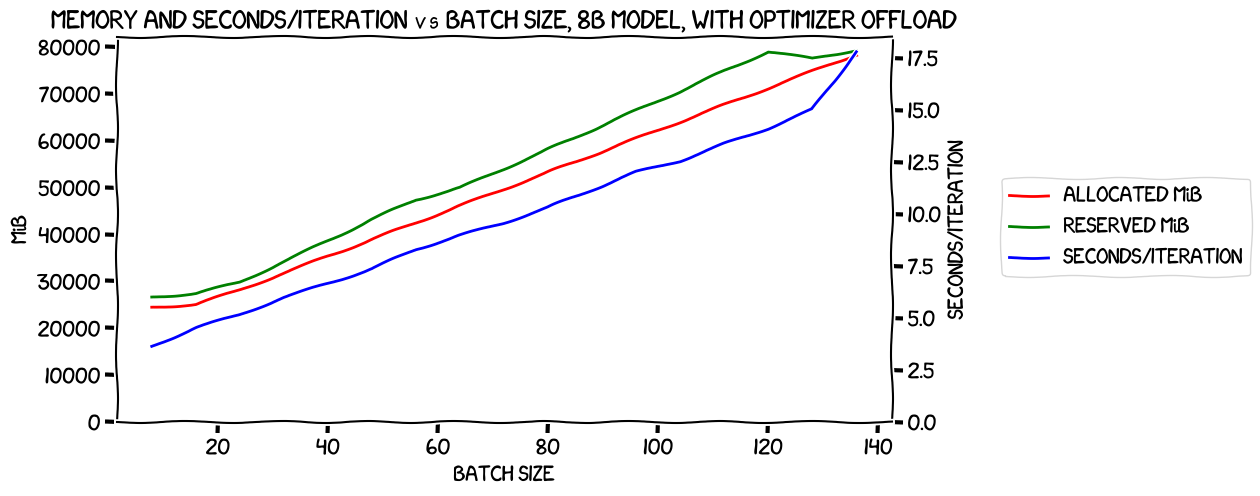

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(large_model_with_offload_df['Batch size'], large_model_with_offload_df['Allocated MiB Max'], label='ALLOCATED MiB', color='red')
ax1.plot(large_model_with_offload_df['Batch size'], large_model_with_offload_df['Reserved MiB Max'], label='RESERVED MiB', color='green')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.plot(large_model_with_offload_df['Batch size'], 1 / large_model_with_offload_df['Iterations/second'], label='SECONDS/ITERATION', color='blue')
ax2.set_ylabel('SECONDS/ITERATION')
ax2.tick_params(axis='y')
ax2.set_ylim(bottom=0)

plt.title('MEMORY AND SECONDS/ITERATION vs BATCH SIZE, 8B MODEL, WITH OPTIMIZER OFFLOAD')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-and-seconds-per-iteration-vs-batch-size-large-model-with-offload.png", bbox_inches='tight')
plt.show()

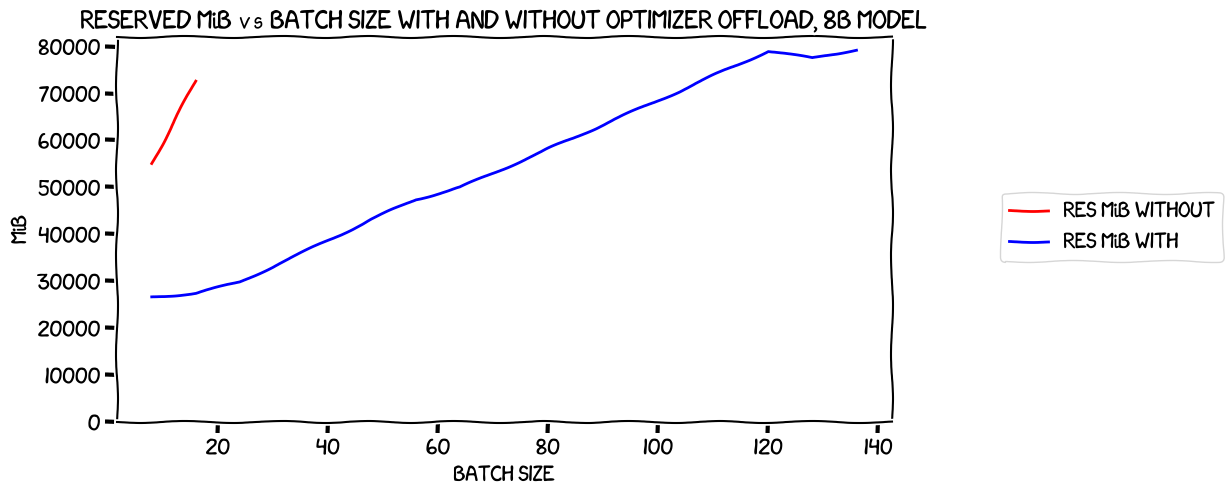

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(large_model_no_offload_df['Batch size'], large_model_no_offload_df['Reserved MiB Max'], label='RES MiB WITHOUT', color='red')
ax1.plot(large_model_with_offload_df['Batch size'], large_model_with_offload_df['Reserved MiB Max'], label='RES MiB WITH', color='blue')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

plt.title('RESERVED MiB vs BATCH SIZE WITH AND WITHOUT OPTIMIZER OFFLOAD, 8B MODEL')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-vs-batch-size-large-model-with-and-without-offload.png", bbox_inches='tight')
plt.show()

In [30]:
add_seconds_to_complete(large_model_no_offload_df)
add_seconds_to_complete(large_model_with_offload_df)
large_model_with_offload_df

,Batch size,Allocated MiB cuda0,Reserved MiB cuda0,Allocated MiB cuda1,Reserved MiB cuda1,Allocated MiB cuda2,Reserved MiB cuda2,Allocated MiB cuda3,Reserved MiB cuda3,Allocated MiB cuda4,...,Reserved MiB cuda7,Iterations/second,Allocated MiB Min,Allocated MiB Mean,Allocated MiB Max,Reserved MiB Min,Reserved MiB Mean,Reserved MiB Max,Num iterations,Seconds to complete
0,8,23929,26666,21363,22206,21363,22206,21363,22206,21363,...,26666,0.275053,21005,22049.5,24497,22206,23348.5,26666,2461,8947
1,16,24593,27406,24593,25446,24593,25446,24593,25446,24593,...,25906,0.221014,24593,24652.0,25065,25446,25748.5,27406,1230,5565
2,24,28182,29806,28182,29806,28182,29806,28182,29806,28182,...,29806,0.193776,28182,28182.0,28182,29806,29806.0,29806,820,4231
3,32,31770,34246,31770,34246,31770,34246,31770,34246,31770,...,34246,0.167022,31770,31770.0,31770,34246,34246.0,34246,615,3682
4,40,35359,38646,35359,38646,35359,38646,35359,38646,35359,...,38646,0.150316,35359,35359.0,35359,38646,38646.0,38646,492,3273
5,48,38947,43226,38947,43226,38947,43226,38947,43226,38947,...,43226,0.135791,38947,38947.0,38947,43226,43226.0,43226,410,3019
6,56,42536,47446,42536,47446,42536,47446,42536,47446,42536,...,47446,0.120490,42536,42536.0,42536,47446,47446.0,47446,351,2913
7,64,46125,49946,46125,49946,46125,49946,46125,49946,46125,...,49946,0.111562,46125,46125.0,46125,49946,49946.0,49946,307,2751
8,72,49713,54046,49713,54046,49713,54046,49713,54046,49713,...,54046,0.104479,49713,49713.0,49713,54046,54046.0,54046,273,2612
9,80,53302,58186,53302,58186,53302,58186,53302,58186,53302,...,58186,0.096889,53302,53302.0,53302,58186,58186.0,58186,246,2538


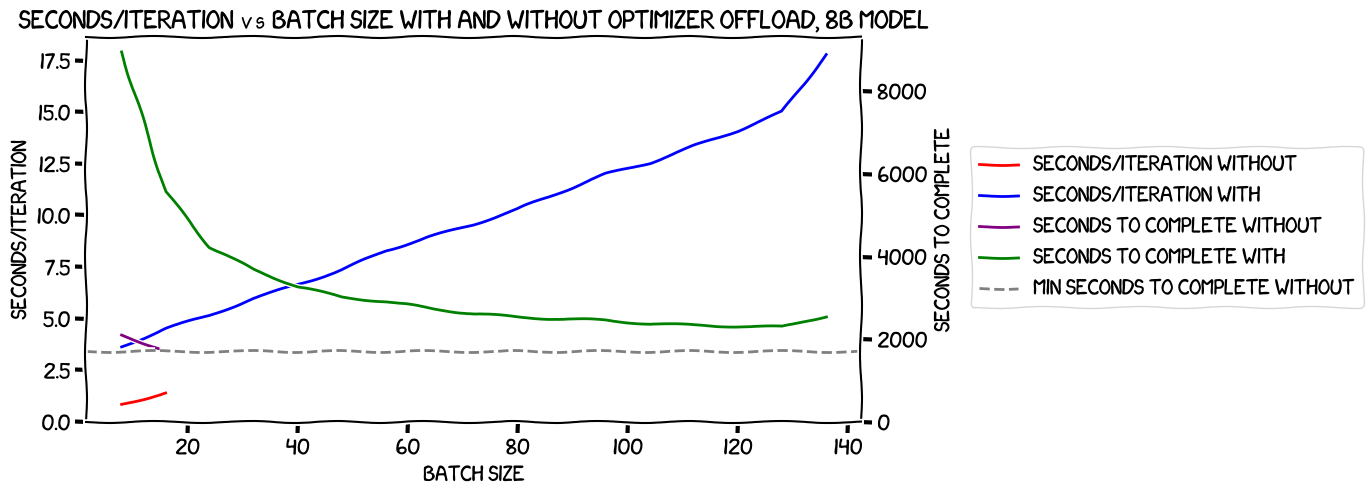

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(large_model_no_offload_df['Batch size'], 1 / large_model_no_offload_df['Iterations/second'], label='SECONDS/ITERATION WITHOUT', color='red')
ax1.plot(large_model_with_offload_df['Batch size'], 1 / large_model_with_offload_df['Iterations/second'], label='SECONDS/ITERATION WITH', color='blue')
ax1.set_ylabel('SECONDS/ITERATION')
ax1.set_xlabel('BATCH SIZE')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.plot(large_model_no_offload_df['Batch size'], large_model_no_offload_df['Seconds to complete'], label='SECONDS TO COMPLETE WITHOUT', color='purple')
ax2.plot(large_model_with_offload_df['Batch size'], large_model_with_offload_df['Seconds to complete'], label='SECONDS TO COMPLETE WITH', color='green')
ax2.set_ylabel('SECONDS TO COMPLETE')
ax2.tick_params(axis='y')
ax2.set_ylim(bottom=0)

min_value = large_model_no_offload_df['Seconds to complete'].min()
ax2.axhline(y=min_value, color='grey', linestyle='--', label='MIN SECONDS TO COMPLETE WITHOUT')

plt.title('SECONDS/ITERATION vs BATCH SIZE WITH AND WITHOUT OPTIMIZER OFFLOAD, 8B MODEL')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/seconds-per-iteration-vs-batch-size-large-model-with-and-without-offload.png", bbox_inches='tight')
plt.show()

# Sanity check: work out the best options

In [32]:
total_rows = 19692

def calculate_best_run_time(df):
    best = df.loc[df['Batch size'].idxmax()]
    num_iterations = total_rows / best["Batch size"]
    return int(num_iterations / best["Iterations/second"])

In [33]:
calculate_best_run_time(small_model_no_offload_df)

4157

In [34]:
calculate_best_run_time(small_model_with_offload_df)

6176

In [35]:
calculate_best_run_time(large_model_no_offload_df)

1725

In [36]:
calculate_best_run_time(large_model_with_offload_df)

2576

In [37]:
1725 / 3600

3.835277777777778

In [39]:
2576 / 3600

0.7155555555555555

Note that when I did a train with optimizer offload previously, it took 2h13m.  Reading off the graph above, it was a real batch size of 40, so 